In [41]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

# Project: Gradient Descent vs Monte Carlo
## 1. Introduction
This project compares two methods for finding the minimum value between Gradient Descent and Monte Carlo

## Part 1: Proof of Concept (1D)
In this section, we test our algorithms on a simple 1D non-convex function to visualize how they work.

**The Objective Function:**
The function we want to minimize is:

$$f(x) = x^4 - 3x^2 + 2$$

This function is chosen because it has **two local minima** (a "W" shape), which makes it a good test case for stability.

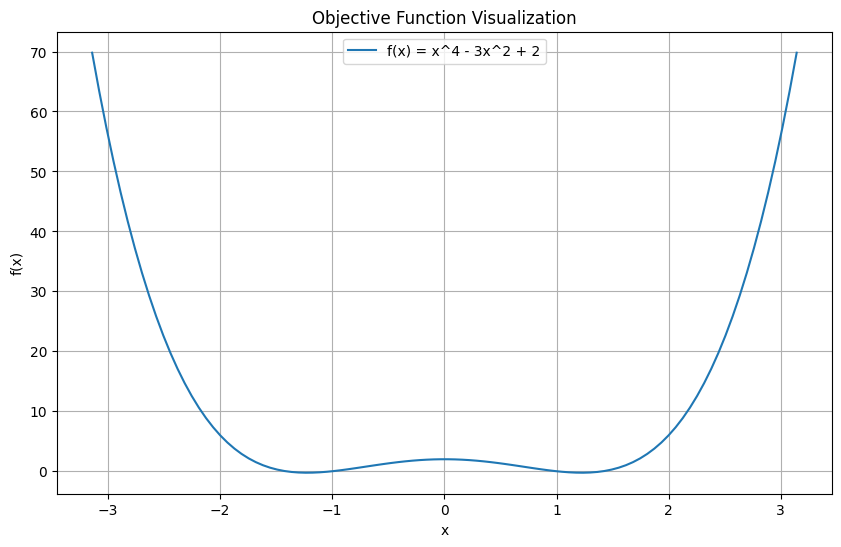

In [42]:
def f(x):
    return x**4 - 3*x**2 + 2

xs = np.linspace(-np.pi, np.pi, 100)
ys = f(xs)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(xs, ys, label='f(x) = x^4 - 3x^2 + 2')
plt.title('Objective Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Gradient Descent Method

In [43]:
def f(x):
    return x**4 - 3*x**2 + 2

def df(x):
    return 4*x**3 - 6*x

def gradient_descent(start_x, learning_rate, num_iteration):
    x_history = [start_x]
    x = start_x

    for i in range(num_iteration):
        gradient = df(x)

        x = x - (learning_rate * gradient)

        x_history.append(x)

    return np.array(x_history)

Final x value: 1.2525
Final f(x) value: -0.2453


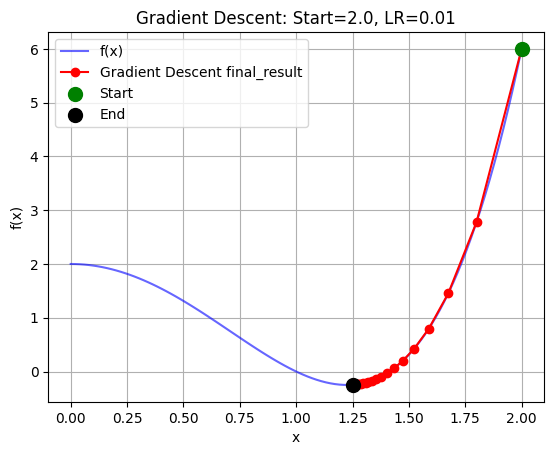

In [44]:
start_x = 2.0      
learning_rate = 0.01   
iterations = 20    

final_result = gradient_descent(start_x, learning_rate, iterations)
print(f"Final x value: {final_result[-1]:.4f}")
print(f"Final f(x) value: {f(final_result[-1]):.4f}")

x_plot = np.linspace(0, 2, 100)
y_plot = f(x_plot)


plt.plot(x_plot, y_plot, label='f(x)', color='blue', alpha=0.6)

plt.plot(final_result, f(final_result), 'o-', color='red', label='Gradient Descent final_result')
plt.scatter(final_result[0], f(final_result[0]), color='green', s=100, zorder=5, label='Start') 
plt.scatter(final_result[-1], f(final_result[-1]), color='black', s=100, zorder=5, label='End')

plt.title(f'Gradient Descent: Start={start_x}, LR={learning_rate}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

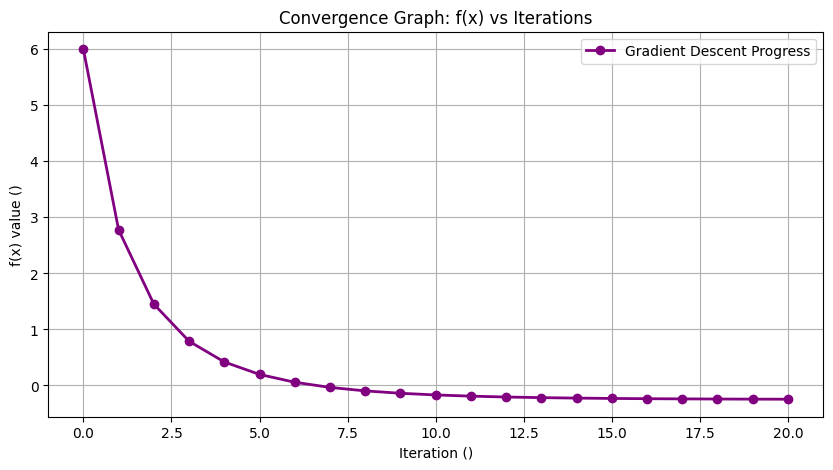

In [45]:
iterations_range = np.arange(len(final_result))


f_history = f(final_result)

plt.figure(figsize=(10, 5))
plt.plot(iterations_range, f_history, 'o-', color='purple', linewidth=2, label='Gradient Descent Progress')

plt.title('Convergence Graph: f(x) vs Iterations')
plt.xlabel('Iteration ()')
plt.ylabel('f(x) value ()')
plt.grid(True)
plt.legend()
plt.show()

# Monte Carlo Method (Random Search)

In [46]:
def monte_carlo_search(f, x_min, x_max, num_samples):
    # 1. Randomly generate x values within the range
    # np.random.uniform(low, high, size) creates random numbers
    random_x = np.random.uniform(x_min, x_max, num_samples)
    
    # 2. Calculate f(x) for all these random points
    random_y = f(random_x)
    
    # 3. Find the minimum index
    min_index = np.argmin(random_y)
    
    # 4. Get the best x and best y
    best_x = random_x[min_index]
    best_y = random_y[min_index]
    
    return best_x, best_y, random_x, random_y

Monte Carlo Best x: 1.3715
Monte Carlo Best f(x): -0.1049


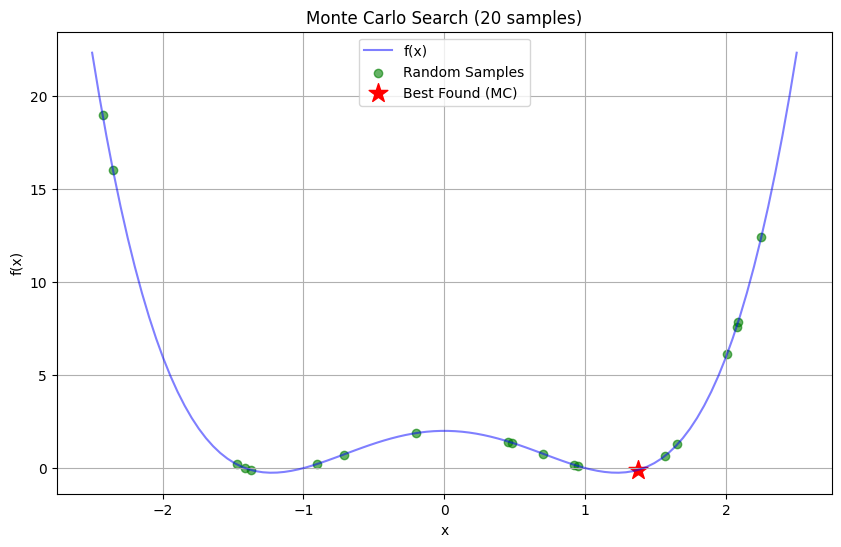

In [47]:
n_samples = 20  
x_min, x_max = -2.5, 2.5

mc_best_x, mc_best_y, mc_all_x, mc_all_y = monte_carlo_search(f, x_min, x_max, n_samples)

print(f"Monte Carlo Best x: {mc_best_x:.4f}")
print(f"Monte Carlo Best f(x): {mc_best_y:.4f}")

x_plot = np.linspace(-2.5, 2.5, 100)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))

plt.plot(x_plot, y_plot, label='f(x)', color='blue', alpha=0.5)

plt.scatter(mc_all_x, mc_all_y, color='green', alpha=0.6, label='Random Samples')

plt.scatter(mc_best_x, mc_best_y, color='red', marker='*', s=200, label='Best Found (MC)')

plt.title(f'Monte Carlo Search ({n_samples} samples)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Comparing f(x) value between two method

In [48]:
gd_final_y = f(final_result[-1]) 

print("--- Result Comparison ---")
print(f"Gradient Descent Minimum: {gd_final_y:.6f}")
print(f"Monte Carlo Minimum:      {mc_best_y:.6f}")

print("-" * 30)
if gd_final_y < mc_best_y:
    print("Winner: Gradient Descent (Found a lower point)")
elif gd_final_y > mc_best_y:
    print("Winner: Monte Carlo (Found a lower point)")
else:
    print("Draw!")

--- Result Comparison ---
Gradient Descent Minimum: -0.245272
Monte Carlo Minimum:      -0.104859
------------------------------
Winner: Gradient Descent (Found a lower point)


## Part 2: The Challenge (2D Multidimensional)
Now we move to a harder problem: **The Rastrigin Function**.
It has many local minima (bumps), making it very difficult for Gradient Descent to find the true global minimum at (0,0).

$$f(x, y) = 20 + x^2 - 10\cos(2\pi x) + y^2 - 10\cos(2\pi y)$$

In [49]:
# 1. Define the 2D Function (Rastrigin Function)
def f2d(x, y):
    A = 10
    return 20 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# 2. Define Partial Derivatives (Gradients)
# df/dx
def df_dx(x, y):
    return 2*x + 20 * np.pi * np.sin(2 * np.pi * x)

# df/dy
def df_dy(x, y):
    return 2*y + 20 * np.pi * np.sin(2 * np.pi * y)

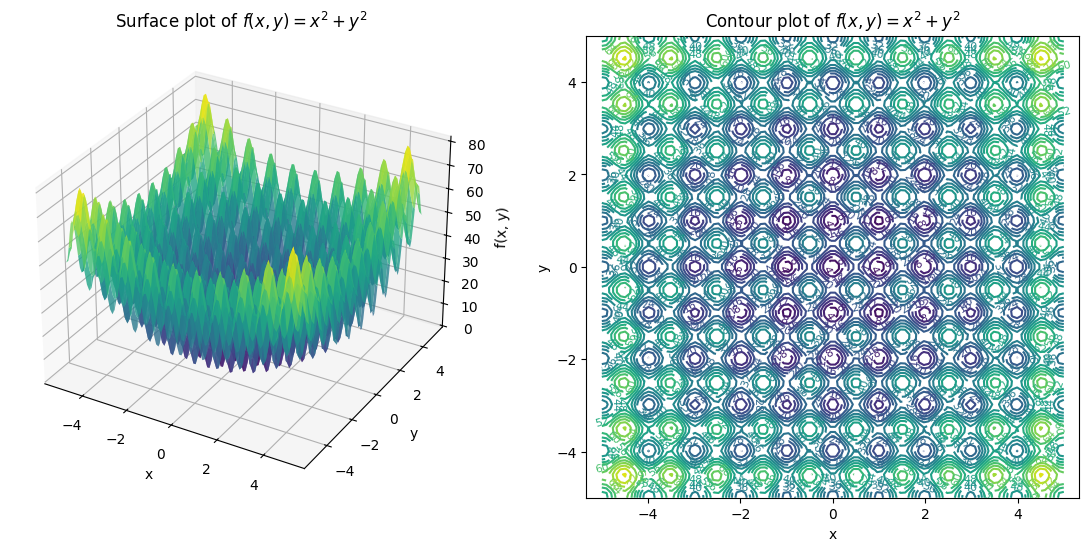

In [50]:
# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f2d(X, Y)

# Create a 3D surface plot
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Surface plot of $f(x, y) = x^2 + y^2$')

# Create a contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot of $f(x, y) = x^2 + y^2$')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.axis('equal')
plt.show()

In [51]:
def gradient_descent_2d(start_x, start_y, lr, iterations):
    path = []
    x, y = start_x, start_y
    path.append([x, y])
    
    for _ in range(iterations):
        # Calculate gradients for both x and y
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update both x and y
        x = x - lr * grad_x
        y = y - lr * grad_y
        
        path.append([x, y])
        
    return np.array(path)

# --- 2. 2D Monte Carlo ---
def monte_carlo_2d(x_min, x_max, y_min, y_max, num_samples):
    # Random x and y
    rx = np.random.uniform(x_min, x_max, num_samples)
    ry = np.random.uniform(y_min, y_max, num_samples)
    
    # Calculate z for all points
    rz = f2d(rx, ry)
    
    # Find minimum
    min_idx = np.argmin(rz)
    return rx[min_idx], ry[min_idx], rx, ry

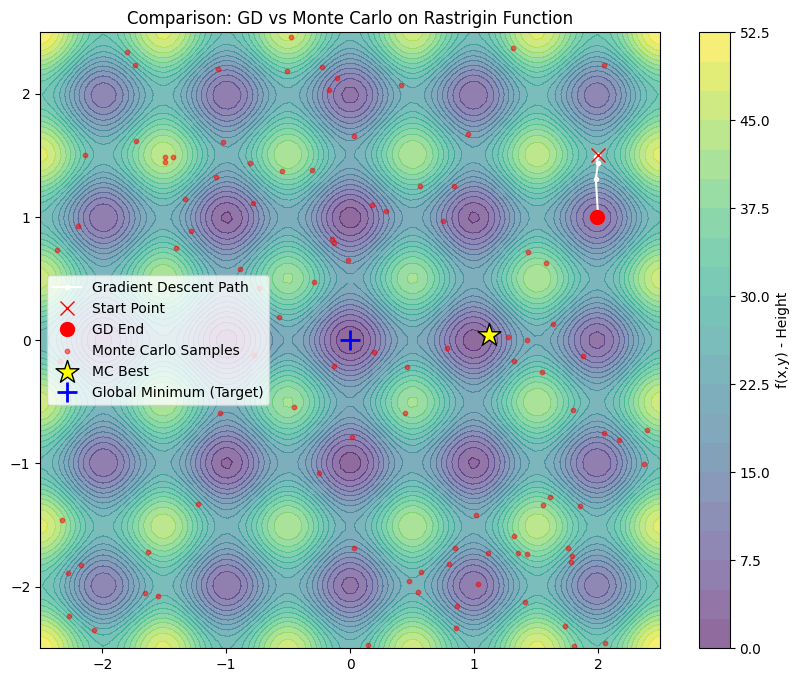

In [52]:
# --- Settings ---
start_x, start_y = 2.0, 1.5  # Start far away from (0,0)
lr = 0.005                   # Learning rate (small to be safe)
iterations = 100             # Give it 100 steps
mc_samples = 100             # Give Monte Carlo 100 guesses (Fair fight)

# --- Run Algorithms ---
# 1. Run Gradient Descent
gd_path = gradient_descent_2d(start_x, start_y, lr, iterations)

# 2. Run Monte Carlo
mc_best_x, mc_best_y, mc_all_x, mc_all_y = monte_carlo_2d(-2.5, 2.5, -2.5, 2.5, mc_samples)

# --- Visualization (Contour Plot) ---
plt.figure(figsize=(10, 8))

# 1. Draw the map (Contour)
x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = f2d(X, Y)
plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.colorbar(label='f(x,y) - Height')

# 2. Plot Gradient Descent Path (White Line)
plt.plot(gd_path[:, 0], gd_path[:, 1], 'w.-', label='Gradient Descent Path')
plt.plot(gd_path[0, 0], gd_path[0, 1], 'rx', markersize=10, label='Start Point') # Start
plt.plot(gd_path[-1, 0], gd_path[-1, 1], 'ro', markersize=10, label='GD End')   # End

# 3. Plot Monte Carlo (Red Dots)
plt.scatter(mc_all_x, mc_all_y, c='red', s=10, alpha=0.5, label='Monte Carlo Samples')
plt.scatter(mc_best_x, mc_best_y, c='yellow', marker='*', s=300, edgecolors='black', label='MC Best')

# Target (The true minimum at 0,0)
plt.plot(0, 0, 'b+', markersize=15, markeredgewidth=2, label='Global Minimum (Target)')

plt.title('Comparison: GD vs Monte Carlo on Rastrigin Function')
plt.legend()
plt.show()

In [53]:
# --- Final Comparison for 2D ---
gd_final_x, gd_final_y = gd_path[-1]
gd_score = f2d(gd_final_x, gd_final_y)
mc_score = f2d(mc_best_x, mc_best_y)

print("--- 2D Optimization Results ---")
print(f"Target (Global Min): f(0,0) = 0.0")
print("-" * 30)
print(f"Gradient Descent stopped at: ({gd_final_x:.2f}, {gd_final_y:.2f})")
print(f"Gradient Descent Score:      {gd_score:.4f}")
print("-" * 30)
print(f"Monte Carlo best found at:   ({mc_best_x:.2f}, {mc_best_y:.2f})")
print(f"Monte Carlo Score:           {mc_score:.4f}")

# Who won?
if gd_score < mc_score:
    print("\nResult: Gradient Descent won (Lower value)")
else:
    print("\nResult: Monte Carlo won (Lower value)")

--- 2D Optimization Results ---
Target (Global Min): f(0,0) = 0.0
------------------------------
Gradient Descent stopped at: (1.99, 1.00)
Gradient Descent Score:      4.9762
------------------------------
Monte Carlo best found at:   (1.12, 0.04)
Monte Carlo Score:           4.4531

Result: Monte Carlo won (Lower value)


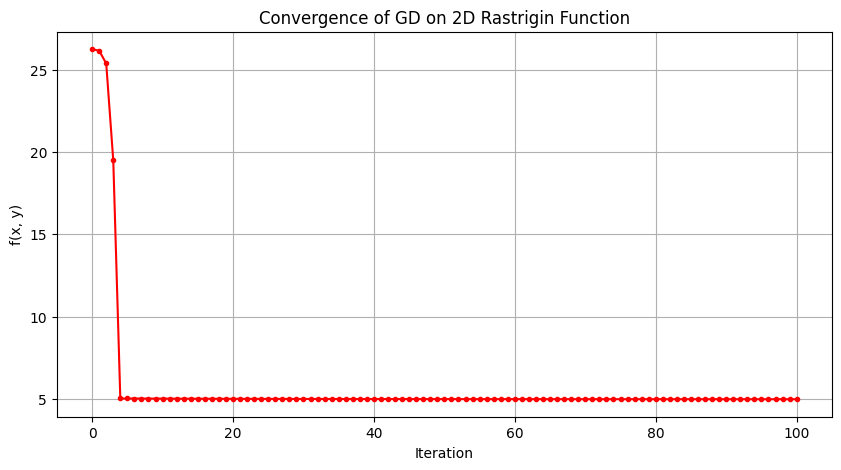

In [54]:
gd_path_x = gd_path[:, 0]
gd_path_y = gd_path[:, 1]

history_scores = f2d(gd_path_x, gd_path_y)

plt.figure(figsize=(10, 5))
plt.plot(history_scores, 'r.-')
plt.title('Convergence of GD on 2D Rastrigin Function')
plt.xlabel('Iteration')
plt.ylabel('f(x, y)')
plt.grid(True)
plt.show()

## 3. Critical Discussion & Conclusion

In this project, we compared **Gradient Descent** and **Monte Carlo** on both simple (1D) and complex (2D Rastrigin) functions.

### Analysis of Results
1.  **Gradient Descent (GD):**
    * **Performance:** Highly efficient and accurate on simple, smooth functions (convex). It quickly converged to the minimum in the 1D test.
    * **Limitation:** In the 2D Rastrigin function, **GD failed to find the global minimum**. As seen in the contour plot, it got trapped in a **"Local Minimum"** near the starting point. It only look at the immediate slope and cannot climb out of a hole.
    * **Stability:** Low stability regarding the starting point. If we start at a different location, the result changes completely.

2.  **Monte Carlo (MC):**
    * **Performance:** It successfully explored the map and was not trapped by the local minimum.
    * **Limitation:** It is computationally expensive. To get high precision (e.g., exactly 0.0000), it would require millions of samples. It is good for *finding the general area*, but not precise for the final decimal points.

### Conclusion
* Use **Gradient Descent** when the problem is simple or when you have a good guess of where the answer is (Local Optimization).
* Use **Monte Carlo** (or hybrid methods) when the problem is complex, has many traps, or when we have no idea where to start (Global Optimization).